In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
activity = pd.read_csv("train_activity.csv").drop("Unnamed: 0", axis=1)
label = pd.read_csv("train_label.csv").drop("Unnamed: 0", axis=1)

In [4]:
activity.head()

,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,7,256576,4,2.088814,4.405057,-0.245477,4.454059,3.009797,-0.306354,1.184011,-0.023443,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.325566,-0.36813,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.309354,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.466939,-0.027758,-0.365536
1,8,256576,5,2.673460,4.760178,-0.222527,6.107479,4.758528,-0.306354,1.709534,-0.023421,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.259179,-0.36813,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.232756,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,5.070359,-0.027758,-0.365536
2,3,341956,2,-0.649522,-0.231021,-0.290803,-0.245978,-0.487666,-0.306354,-0.566706,-0.023543,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,-0.36813,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
3,4,341956,2,-0.658235,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,-0.023543,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,-0.36813,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
4,5,341956,4,-0.654734,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,-0.023543,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,-0.36813,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536


In [5]:
label.head()

,acc_id,label
0,296055,week
1,242766,week
2,331227,week
3,176996,week
4,36152,week


<br></br><br></br><br></br>

In [6]:
id_lst = sorted(list(label["acc_id"]))

print(len(id_lst))

100000


In [7]:
min_lst = [0]+ list(activity.min())[3:]

print(len(activity.columns))
print(len(min_lst))
print(min_lst)

38
36
[0, -0.66166737368586703, -0.23187404383711799, -0.29080319416227096, -0.25042335545275801, -0.48766624887076698, -0.306353601768793, -0.56984181493662289, -0.023542864552727999, -0.036168043070860703, -0.041325706121907099, -0.16747253955822899, -0.159872456051349, -0.30874901478870698, -0.42459146738591708, -0.19067142960053896, -0.458338915202331, -0.36812964898735612, -0.40205275725074202, -0.047642900560293501, -0.306502306156819, -0.43026333989039511, -0.18878786561800401, -0.46254810329840401, -0.36761612780601499, -0.40115791759805403, -0.033130423698603299, -0.034037661335678503, -0.23182695053692001, -0.0165738550449223, -0.27517378864131203, -0.34329315990913212, -0.024028021828956601, -0.50369203220934899, -0.027758311120298699, -0.36553646455217798]


In [8]:
activity_dic = {}

for i in id_lst :
    for idx in range(1,9) : 
        activity_dic[(idx, (int(i)))] = min_lst
        
print(len(activity_dic))

800000


In [9]:
for data in activity.values :
    activity_dic[(int(data[0]), int(data[1]))] = data[2:]

In [10]:
activity_lst = [list(y) for y in activity_dic.values()]
activity_lst[0]

[7.0,
 1.1186796652143001,
 -0.23187404383711799,
 0.62089383262644704,
 -0.25042335545275801,
 0.775215810330808,
 0.549570821725343,
 0.90523280478207724,
 -0.014794916430443599,
 0.13755600538371099,
 0.208673645558455,
 6.4750933917829201,
 6.2923421457450903,
 -0.30874901478870698,
 0.59317452243608604,
 -0.19067142960053896,
 0.62597661318211595,
 1.12436302721398,
 1.7284645374228702,
 -0.047642900560293501,
 -0.306502306156819,
 0.5869377215598921,
 -0.18878786561800401,
 0.63534524751305699,
 0.99716315040983405,
 1.7789590810199001,
 -0.033130423698603299,
 0.18169723577544,
 2.5777555289285097,
 0.0123393064586017,
 2.5850824646089903,
 2.4135611557066001,
 -0.024028021828956601,
 2.41063181722923,
 -0.027758311120298699,
 3.5048784613889299]

In [13]:
cols = list(activity.columns[2:])
col_dic = {}

for idx, col in enumerate(cols) :
    col_dic[idx] = col 

In [14]:
activity.sort_values(by=["acc_id", "wk"]).head(20)

,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
341408,1,18,7,1.118680,-0.231874,0.620894,-0.250423,0.775216,0.549571,0.905233,-0.014795,0.137556,0.208674,6.475093,6.292342,-0.308749,0.593175,-0.190671,0.625977,1.124363,1.728465,-0.047643,-0.306502,0.586938,-0.188788,0.635345,0.997163,1.778959,-0.03313,0.181697,2.577756,0.012339,2.585082,2.413561,-0.024028,2.410632,-0.027758,3.504878
341409,2,18,7,2.027186,-0.231874,1.446126,-0.250423,2.092845,0.333512,1.805012,0.013952,0.028978,0.058674,3.996524,4.204861,-0.030266,1.769260,-0.190671,1.710292,2.616856,3.148809,-0.047643,-0.026092,1.708467,-0.188788,1.631109,1.679553,3.232370,-0.03313,0.043768,2.195751,-0.016574,2.619647,1.824373,-0.024028,2.908992,-0.027758,3.142027
341410,3,18,7,0.992366,-0.231874,0.574930,-0.250423,1.057040,0.154848,0.983988,0.032468,0.072409,0.108674,5.979380,6.102571,-0.308749,0.457472,0.408652,0.448946,2.119358,3.858982,-0.047643,-0.306502,0.352199,0.424934,0.354489,2.361942,3.959076,-0.03313,0.404505,1.148319,0.002702,2.459784,1.300954,-0.024028,2.123533,-0.027758,0.964919
341411,4,18,7,2.086213,-0.231874,1.277514,-0.250423,1.703230,1.816838,2.180256,0.055894,0.745590,1.008672,8.061378,8.379823,0.248218,0.638409,2.506282,0.980039,2.616856,3.148809,5.512386,0.254319,0.743430,2.572960,1.094929,3.044332,3.232370,-0.03313,0.468165,1.357805,-0.016574,3.950401,3.315157,-0.024028,3.434437,-0.027758,2.658225
341412,5,18,7,1.464852,-0.231874,0.874912,-0.250423,1.943185,3.998198,1.285647,-0.013040,0.224418,0.308673,7.565664,7.051426,-0.123093,0.593175,0.708313,0.825137,3.114353,3.858982,-0.047643,-0.119562,0.639102,0.731795,0.916202,3.726722,3.959076,-0.03313,0.531824,0.569151,-0.016574,2.520273,2.029903,-0.024028,2.356462,-0.027758,1.448721
341413,6,18,7,1.191712,-0.231874,0.663366,-0.250423,1.054479,0.048897,0.953593,0.000465,-0.036168,-0.041326,8.061378,8.569594,-0.308749,0.434855,1.307636,0.581719,1.124363,2.438637,-0.047643,-0.306502,0.404363,1.345517,0.584280,0.997163,2.505665,-0.03313,0.400969,1.283869,0.075948,3.509697,2.103895,-0.024028,2.058529,-0.027758,1.085869
341414,7,18,7,1.990926,-0.231874,1.399399,-0.250423,0.957934,-0.289734,2.045090,0.006543,0.028978,0.008674,13.117659,13.503641,-0.308749,1.135983,1.007975,1.289843,-0.368130,1.018292,-0.047643,-0.306502,1.212908,1.038656,1.401317,-0.367616,1.052253,-0.03313,0.323163,2.405237,-0.016574,5.510148,3.526168,-0.024028,4.165726,-0.027758,1.811572
341415,8,18,7,0.680791,-0.231874,0.402474,-0.250423,0.449135,-0.306354,0.685210,-0.019455,0.007263,0.058674,5.087095,5.153716,-0.308749,0.276536,-0.190671,0.382559,-0.368130,0.308120,5.512386,-0.306502,0.378281,-0.188788,0.405554,-0.367616,0.325548,-0.03313,0.195844,0.852573,-0.016574,2.269677,1.659948,-0.024028,1.506000,-0.027758,2.779176
303284,2,20,1,-0.660777,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,-0.023543,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,-0.368130,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
303285,4,20,2,-0.238051,0.008328,-0.262195,1.121005,2.016436,-0.271036,-0.187931,-0.023520,-0.036168,-0.041326,-0.167473,-0.159872,0.020368,-0.356740,-0.190671,-0.391952,-0.368130,0.663206,-0.047643,0.024892,-0.352017,-0.188788,-0.385951,-0.367616,0.688901,-0.03313,-0.002208,-0.231827,-0.016574,-0.184441,-0.343293,-0.024028,-0.184091,-0.027758,-0.365536


In [15]:
activity2 = pd.DataFrame(activity_lst).rename(columns=col_dic)

print(len(activity2))
activity2.head(20)

800000


,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,7.0,1.118680,-0.231874,0.620894,-0.250423,0.775216,0.549571,0.905233,-0.014795,0.137556,0.208674,6.475093,6.292342,-0.308749,0.593175,-0.190671,0.625977,1.124363,1.728465,-0.047643,-0.306502,0.586938,-0.188788,0.635345,0.997163,1.778959,-0.03313,0.181697,2.577756,0.012339,2.585082,2.413561,-0.024028,2.410632,-0.027758,3.504878
1,7.0,2.027186,-0.231874,1.446126,-0.250423,2.092845,0.333512,1.805012,0.013952,0.028978,0.058674,3.996524,4.204861,-0.030266,1.769260,-0.190671,1.710292,2.616856,3.148809,-0.047643,-0.026092,1.708467,-0.188788,1.631109,1.679553,3.232370,-0.03313,0.043768,2.195751,-0.016574,2.619647,1.824373,-0.024028,2.908992,-0.027758,3.142027
2,7.0,0.992366,-0.231874,0.574930,-0.250423,1.057040,0.154848,0.983988,0.032468,0.072409,0.108674,5.979380,6.102571,-0.308749,0.457472,0.408652,0.448946,2.119358,3.858982,-0.047643,-0.306502,0.352199,0.424934,0.354489,2.361942,3.959076,-0.03313,0.404505,1.148319,0.002702,2.459784,1.300954,-0.024028,2.123533,-0.027758,0.964919
3,7.0,2.086213,-0.231874,1.277514,-0.250423,1.703230,1.816838,2.180256,0.055894,0.745590,1.008672,8.061378,8.379823,0.248218,0.638409,2.506282,0.980039,2.616856,3.148809,5.512386,0.254319,0.743430,2.572960,1.094929,3.044332,3.232370,-0.03313,0.468165,1.357805,-0.016574,3.950401,3.315157,-0.024028,3.434437,-0.027758,2.658225
4,7.0,1.464852,-0.231874,0.874912,-0.250423,1.943185,3.998198,1.285647,-0.013040,0.224418,0.308673,7.565664,7.051426,-0.123093,0.593175,0.708313,0.825137,3.114353,3.858982,-0.047643,-0.119562,0.639102,0.731795,0.916202,3.726722,3.959076,-0.03313,0.531824,0.569151,-0.016574,2.520273,2.029903,-0.024028,2.356462,-0.027758,1.448721
5,7.0,1.191712,-0.231874,0.663366,-0.250423,1.054479,0.048897,0.953593,0.000465,-0.036168,-0.041326,8.061378,8.569594,-0.308749,0.434855,1.307636,0.581719,1.124363,2.438637,-0.047643,-0.306502,0.404363,1.345517,0.584280,0.997163,2.505665,-0.03313,0.400969,1.283869,0.075948,3.509697,2.103895,-0.024028,2.058529,-0.027758,1.085869
6,7.0,1.990926,-0.231874,1.399399,-0.250423,0.957934,-0.289734,2.045090,0.006543,0.028978,0.008674,13.117659,13.503641,-0.308749,1.135983,1.007975,1.289843,-0.368130,1.018292,-0.047643,-0.306502,1.212908,1.038656,1.401317,-0.367616,1.052253,-0.03313,0.323163,2.405237,-0.016574,5.510148,3.526168,-0.024028,4.165726,-0.027758,1.811572
7,7.0,0.680791,-0.231874,0.402474,-0.250423,0.449135,-0.306354,0.685210,-0.019455,0.007263,0.058674,5.087095,5.153716,-0.308749,0.276536,-0.190671,0.382559,-0.368130,0.308120,5.512386,-0.306502,0.378281,-0.188788,0.405554,-0.367616,0.325548,-0.03313,0.195844,0.852573,-0.016574,2.269677,1.659948,-0.024028,1.506000,-0.027758,2.779176
8,0.0,-0.661667,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,-0.023543,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,-0.368130,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
9,1.0,-0.660777,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,-0.023543,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,-0.368130,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,-0.367616,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536


In [16]:
label_dic = {"week":0 , "month" :1, "2month":2, "retained":3}

In [17]:
label2 = label.sort_values(by="acc_id")
label2["label"] = label2["label"].map(lambda x : label_dic[x])

label2.head()

,acc_id,label
75988,18,3
870,20,0
4600,21,0
50725,25,2
87284,26,3


<br></br><br></br><br></br>

In [18]:
def one_hot(lst, num_class=4) :
    return np.eye(num_class)[lst]

In [19]:
total_lst = []
wk = 8

for now in range(0,800001,8) :
    if now == 0 :
        last = now
        continue
    
    total_lst.append(activity_lst[last:now])
    last=now
    
print(len(total_lst))

100000


In [20]:
total_label = one_hot(label2.label.values)
print(len(total_label))

100000


In [21]:
training_lst = np.array(total_lst[:80000])
valid_lst = np.array(total_lst[80000:90000])
test_lst = np.array(total_lst[90000:])

training_label = np.array(total_label[:80000])
valid_label = np.array(total_label[80000:90000])
test_label = np.array(total_label[90000:])

In [22]:
print(len(training_lst[0]))
training_lst[0]

8


array([[  7.00000000e+00,   1.11867967e+00,  -2.31874044e-01,
          6.20893833e-01,  -2.50423355e-01,   7.75215810e-01,
          5.49570822e-01,   9.05232805e-01,  -1.47949164e-02,
          1.37556005e-01,   2.08673646e-01,   6.47509339e+00,
          6.29234215e+00,  -3.08749015e-01,   5.93174522e-01,
         -1.90671430e-01,   6.25976613e-01,   1.12436303e+00,
          1.72846454e+00,  -4.76429006e-02,  -3.06502306e-01,
          5.86937722e-01,  -1.88787866e-01,   6.35345248e-01,
          9.97163150e-01,   1.77895908e+00,  -3.31304237e-02,
          1.81697236e-01,   2.57775553e+00,   1.23393065e-02,
          2.58508246e+00,   2.41356116e+00,  -2.40280218e-02,
          2.41063182e+00,  -2.77583111e-02,   3.50487846e+00],
       [  7.00000000e+00,   2.02718551e+00,  -2.31874044e-01,
          1.44612632e+00,  -2.50423355e-01,   2.09284512e+00,
          3.33512229e-01,   1.80501166e+00,   1.39522381e-02,
          2.89784751e-02,   5.86740346e-02,   3.99652401e+00,
       

<br></br><br></br><br></br>

# Model

In [67]:
input_length = 8
input_size = 36
input_class = 4
hidden_layer1 = 64
hidden_layer2 = 128

In [68]:
class Model1() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, cell2])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense = tf.layers.dense(inputs=output, units=input_class)
            self.logits = dense

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc
                 

In [69]:
class Model2() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, cell2])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense = tf.layers.dense(inputs=output, units=input_class)
            self.logits = dense

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [70]:
class Model3() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.5)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, dropout2, cell3])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense = tf.layers.dense(inputs=output, units=input_class)
            self.logits = dense

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [71]:
class Model4() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.5)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, dropout2, cell3])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense = tf.layers.dense(inputs=output, units=input_class)
            self.logits = dense

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [72]:
class Model5() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, cell2])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=32)
            dense2 = tf.layers.dense(inputs=dense1, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [73]:
class Model6() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, cell2])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=64)
            dense2 = tf.layers.dense(inputs=dense1, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [74]:
class Model7() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.5)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, dropout2, cell3])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=32)
            dense2 = tf.layers.dense(inputs=dense1, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [75]:
class Model8() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.5)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, dropout2, cell3])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=64)
            dense2 = tf.layers.dense(inputs=dense1, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

<br></br><br></br><br></br>

In [38]:
learning_rate1 = 0.01
learning_rate2 = 0.005
learning_rate3 = 0.002
learning_rate4 = 0.001

total_epoch = 160
batch_size = 500

In [77]:
train_losses1 = []
train_accs1 = []
valid_losses1 = []
valid_accs1 = []

train_losses2 = []
train_accs2 = []
valid_losses2 = []
valid_accs2 = []

train_losses3 = []
train_accs3 = []
valid_losses3 = []
valid_accs3 = []

train_losses4 = []
train_accs4 = []
valid_losses4 = []
valid_accs4 = []

train_losses5 = []
train_accs5 = []
valid_losses5 = []
valid_accs5 = []

train_losses6 = []
train_accs6 = []
valid_losses6 = []
valid_accs6 = []

train_losses7 = []
train_accs7 = []
valid_losses7 = []
valid_accs7 = []

train_losses8 = []
train_accs8 = []
valid_losses8 = []
valid_accs8 = []

In [81]:
sess = tf.Session()

model1 = Model1(sess, "model1")
model1.build()

model2 = Model2(sess, "model2")
model2.build()

model3 = Model3(sess, "model3")
model3.build()

model4 = Model4(sess, "model4")
model4.build()

model5 = Model5(sess, "model5")
model5.build()

model6 = Model6(sess, "model6")
model6.build()

model7 = Model7(sess, "model7")
model7.build()

model8 = Model8(sess, "model8")
model8.build()

sess.run(tf.global_variables_initializer())

In [82]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    avg_cost5 = 0
    avg_cost6 = 0
    avg_cost7 = 0
    avg_cost8 = 0
    
    total_batch = int(len(training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 40 :
        learning_rate = learning_rate2
    elif epoch == 80 :
        learning_rate = learning_rate3
    elif epoch == 120 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = training_lst[idx:idx+batch_size],training_label[idx:idx+batch_size]
        
        c1, _ = model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = model4.train(batch_xs, batch_ys, learning_rate)
        c5, _ = model5.train(batch_xs, batch_ys, learning_rate)
        c6, _ = model6.train(batch_xs, batch_ys, learning_rate)
        c7, _ = model7.train(batch_xs, batch_ys, learning_rate)
        c8, _ = model8.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        avg_cost5 += c5 / total_batch
        avg_cost6 += c6 / total_batch
        avg_cost7 += c7 / total_batch
        avg_cost8 += c8 / total_batch
        
        idx += batch_size
        
        if i%55 == 0 :
            print("log1 : ", avg_cost1)
            print("log2 : ", avg_cost2)
            print("log3 : ", avg_cost3)
            print("log4 : ", avg_cost4)
            print("log5 : ", avg_cost5)
            print("log6 : ", avg_cost6)
            print("log7 : ", avg_cost7)
            print("log8 : ", avg_cost8)
            
    #train cost & acc
    cost1, acc1 = model1.evaluate(training_lst, training_label, batch_size = batch_size)
    cost2, acc2 = model2.evaluate(training_lst, training_label, batch_size = batch_size)
    cost3, acc3 = model3.evaluate(training_lst, training_label, batch_size = batch_size)
    cost4, acc4 = model4.evaluate(training_lst, training_label, batch_size = batch_size)
    cost5, acc5 = model5.evaluate(training_lst, training_label, batch_size = batch_size)
    cost6, acc6 = model6.evaluate(training_lst, training_label, batch_size = batch_size)
    cost7, acc7 = model7.evaluate(training_lst, training_label, batch_size = batch_size)
    cost8, acc8 = model8.evaluate(training_lst, training_label, batch_size = batch_size)
    
    train_losses1.append(cost1)
    train_accs1.append(acc1)
    train_losses2.append(cost2)
    train_accs2.append(acc2)
    train_losses3.append(cost3)
    train_accs3.append(acc3)
    train_losses4.append(cost4)
    train_accs4.append(acc4)
    train_losses5.append(cost5)
    train_accs5.append(acc5)
    train_losses6.append(cost6)
    train_accs6.append(acc6)
    train_losses7.append(cost7)
    train_accs7.append(acc7)
    train_losses8.append(cost8)
    train_accs8.append(acc8)
    
    #test cost & acc
    v_cost1, v_acc1 = model1.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = model2.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = model3.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = model4.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost5, v_acc5 = model5.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost6, v_acc6 = model6.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost7, v_acc7 = model7.evaluate(valid_lst, valid_label, batch_size = batch_size)
    v_cost8, v_acc8 = model8.evaluate(valid_lst, valid_label, batch_size = batch_size)
    
    valid_losses1.append(v_cost1)
    valid_accs1.append(v_acc1)
    valid_losses2.append(v_cost2)
    valid_accs2.append(v_acc2)
    valid_losses3.append(v_cost3)
    valid_accs3.append(v_acc3)
    valid_losses4.append(v_cost4)
    valid_accs4.append(v_acc4)
    valid_losses5.append(v_cost5)
    valid_accs5.append(v_acc5)
    valid_losses6.append(v_cost6)
    valid_accs6.append(v_acc6)
    valid_losses7.append(v_cost7)
    valid_accs7.append(v_acc7)
    valid_losses8.append(v_cost8)
    valid_accs8.append(v_acc8)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost5, acc5*100, v_cost5, v_acc5*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost6, acc6*100, v_cost6, v_acc6*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost7, acc7*100, v_cost7, v_acc7*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost8, acc8*100, v_cost8, v_acc8*100))
    print('Accuracy:', model1.get_accuracy(test_lst, test_label))
    print('Accuracy:', model2.get_accuracy(test_lst, test_label))
    print('Accuracy:', model3.get_accuracy(test_lst, test_label))
    print('Accuracy:', model4.get_accuracy(test_lst, test_label))
    print('Accuracy:', model5.get_accuracy(test_lst, test_label))
    print('Accuracy:', model6.get_accuracy(test_lst, test_label))
    print('Accuracy:', model7.get_accuracy(test_lst, test_label))
    print('Accuracy:', model8.get_accuracy(test_lst, test_label))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

log1 :  0.00877697244287
log2 :  0.00860432088375
log3 :  0.00861336067319
log4 :  0.00876764953136
log5 :  0.0087120719254
log6 :  0.00865052640438
log7 :  0.00869345143437
log8 :  0.00872086808085
log1 :  0.349854965135
log2 :  0.360997832939
log3 :  0.375406671315
log4 :  0.386751549691
log5 :  0.357075200602
log6 :  0.371049912274
log7 :  0.365096192807
log8 :  0.386621977761
log1 :  0.652112753317
log2 :  0.662248700112
log3 :  0.682088888437
log4 :  0.698082517833
log5 :  0.660488437116
log6 :  0.678269103542
log7 :  0.674049081653
log8 :  0.696353491768
epoch :  0  -- train 0.82027(63.8%), valid0.82249(63.3%)
epoch :  0  -- train 0.82187(63.8%), valid0.82045(63.6%)
epoch :  0  -- train 0.83973(63.3%), valid0.83851(63.2%)
epoch :  0  -- train 0.83067(63.4%), valid0.83190(63.2%)
epoch :  0  -- train 0.82769(63.8%), valid0.82225(63.7%)
epoch :  0  -- train 0.82297(64.5%), valid0.82397(64.5%)
epoch :  0  -- train 0.85410(62.6%), valid0.85239(62.4%)
epoch :  0  -- 

log1 :  0.246289565042
log2 :  0.241413896903
log3 :  0.25333109051
log4 :  0.248247781023
log5 :  0.246847833693
log6 :  0.244030240551
log7 :  0.257379554957
log8 :  0.24904570803
log1 :  0.490205878019
log2 :  0.482480433956
log3 :  0.504334905371
log4 :  0.495943788439
log5 :  0.492592880502
log6 :  0.486624296755
log7 :  0.511475963145
log8 :  0.498255800083
epoch :  7  -- train 0.69558(69.0%), valid0.71382(68.5%)
epoch :  7  -- train 0.68777(69.5%), valid0.71534(68.4%)
epoch :  7  -- train 0.71769(68.2%), valid0.73328(67.8%)
epoch :  7  -- train 0.70572(68.6%), valid0.71526(68.7%)
epoch :  7  -- train 0.70188(68.7%), valid0.72562(68.0%)
epoch :  7  -- train 0.69336(69.2%), valid0.72351(67.8%)
epoch :  7  -- train 0.72720(67.8%), valid0.74190(67.4%)
epoch :  7  -- train 0.71388(68.4%), valid0.72822(67.9%)
Accuracy: 0.6924
Accuracy: 0.6921
Accuracy: 0.6819
Accuracy: 0.6879
Accuracy: 0.6876
Accuracy: 0.6882
Accuracy: 0.6768
Accuracy: 0.6753
 
log1 :  0.00425629764795
log2 :  0.00430

log1 :  0.475895356759
log2 :  0.466048121825
log3 :  0.490957122669
log4 :  0.483280621096
log5 :  0.47503875047
log6 :  0.4666820582
log7 :  0.492067561671
log8 :  0.482155428827
epoch :  14  -- train 0.67655(69.8%), valid0.70597(69.1%)
epoch :  14  -- train 0.66049(70.6%), valid0.69977(69.0%)
epoch :  14  -- train 0.70120(68.8%), valid0.72345(68.3%)
epoch :  14  -- train 0.69097(69.2%), valid0.71582(68.6%)
epoch :  14  -- train 0.68347(69.6%), valid0.71038(68.9%)
epoch :  14  -- train 0.67080(69.8%), valid0.70982(68.6%)
epoch :  14  -- train 0.70375(68.8%), valid0.72292(68.3%)
epoch :  14  -- train 0.68882(69.4%), valid0.71711(68.3%)
Accuracy: 0.6939
Accuracy: 0.6988
Accuracy: 0.6845
Accuracy: 0.6886
Accuracy: 0.6938
Accuracy: 0.6921
Accuracy: 0.6835
Accuracy: 0.6888
 
log1 :  0.00422885753214
log2 :  0.00414480119944
log3 :  0.00428958646953
log4 :  0.00413043536246
log5 :  0.00427059233189
log6 :  0.00412165224552
log7 :  0.00441840663552
log8 :  0.00419482327998
log1 :  0.2373321

epoch :  21  -- train 0.66225(70.5%), valid0.69800(69.3%)
epoch :  21  -- train 0.64899(71.1%), valid0.70706(69.1%)
epoch :  21  -- train 0.68879(69.5%), valid0.71150(68.9%)
epoch :  21  -- train 0.67929(69.8%), valid0.70943(68.9%)
epoch :  21  -- train 0.67409(70.1%), valid0.71160(68.9%)
epoch :  21  -- train 0.65087(70.8%), valid0.71087(68.7%)
epoch :  21  -- train 0.69306(69.1%), valid0.72160(68.2%)
epoch :  21  -- train 0.68299(69.5%), valid0.71743(68.2%)
Accuracy: 0.6982
Accuracy: 0.6994
Accuracy: 0.6895
Accuracy: 0.6952
Accuracy: 0.6948
Accuracy: 0.6948
Accuracy: 0.6894
Accuracy: 0.6933
 
log1 :  0.00406696163118
log2 :  0.00384422726929
log3 :  0.00429487340152
log4 :  0.0040793698281
log5 :  0.00410954542458
log6 :  0.00407434850931
log7 :  0.00427145771682
log8 :  0.00424506217241
log1 :  0.232485169545
log2 :  0.228386101127
log3 :  0.240560870245
log4 :  0.238947219029
log5 :  0.233366442099
log6 :  0.228576356545
log7 :  0.242293332517
log8 :  0.237403569371
log1 :  0.46496

Accuracy: 0.6988
Accuracy: 0.6901
Accuracy: 0.6968
Accuracy: 0.6974
Accuracy: 0.6985
Accuracy: 0.6905
Accuracy: 0.6955
 
log1 :  0.00408371724188
log2 :  0.00395330265164
log3 :  0.00424696281552
log4 :  0.00408904403448
log5 :  0.0040763374418
log6 :  0.00402769558132
log7 :  0.00417136922479
log8 :  0.00406958758831
log1 :  0.230001184717
log2 :  0.22583812736
log3 :  0.241557480395
log4 :  0.236774027348
log5 :  0.232137431577
log6 :  0.22356428653
log7 :  0.240807452425
log8 :  0.233571206406
log1 :  0.460387628898
log2 :  0.449251067638
log3 :  0.47996012792
log4 :  0.474191950262
log5 :  0.46084420085
log6 :  0.446451034769
log7 :  0.481612962484
log8 :  0.466989858821
epoch :  29  -- train 0.65525(70.8%), valid0.69941(69.4%)
epoch :  29  -- train 0.64113(71.3%), valid0.70193(68.8%)
epoch :  29  -- train 0.68651(69.5%), valid0.70886(68.8%)
epoch :  29  -- train 0.68029(69.8%), valid0.71131(69.1%)
epoch :  29  -- train 0.66091(70.5%), valid0.70265(69.5%)
epoch :  29  -- train 0.64

Accuracy: 0.6905
Accuracy: 0.6964
Accuracy: 0.7002
Accuracy: 0.6977
Accuracy: 0.6929
Accuracy: 0.6916
 
log1 :  0.00407990887761
log2 :  0.00396323464811
log3 :  0.00415818206966
log4 :  0.00402400419116
log5 :  0.00397386103868
log6 :  0.00385660640895
log7 :  0.00419423133135
log8 :  0.00428621955216
log1 :  0.227889378369
log2 :  0.223045881093
log3 :  0.238135492802
log4 :  0.237209653109
log5 :  0.22864866741
log6 :  0.220002903417
log7 :  0.239907082915
log8 :  0.234029076621
log1 :  0.456257320195
log2 :  0.446304409951
log3 :  0.474956816807
log4 :  0.472227342054
log5 :  0.456043092161
log6 :  0.438492161781
log7 :  0.477696891129
log8 :  0.467949925736
epoch :  36  -- train 0.65298(70.7%), valid0.70697(69.1%)
epoch :  36  -- train 0.63114(71.8%), valid0.69645(69.6%)
epoch :  36  -- train 0.68022(69.7%), valid0.70775(69.1%)
epoch :  36  -- train 0.67988(69.9%), valid0.71080(69.1%)
epoch :  36  -- train 0.65410(70.8%), valid0.69761(69.5%)
epoch :  36  -- train 0.63081(71.8%), v

Accuracy: 0.6979
Accuracy: 0.7028
Accuracy: 0.7042
Accuracy: 0.701
Accuracy: 0.7017
 
log1 :  0.00398769974709
log2 :  0.00382068566978
log3 :  0.00417461469769
log4 :  0.00406140424311
log5 :  0.00379945114255
log6 :  0.00369966216385
log7 :  0.00392478071153
log8 :  0.00394435077906
log1 :  0.219629390538
log2 :  0.212326846272
log3 :  0.231173474342
log4 :  0.228567797318
log5 :  0.219909173995
log6 :  0.206503601
log7 :  0.231628762558
log8 :  0.223993985727
log1 :  0.437538914382
log2 :  0.42304459326
log3 :  0.462292390689
log4 :  0.455321520939
log5 :  0.437710141763
log6 :  0.411941867694
log7 :  0.461228264496
log8 :  0.447543282062
epoch :  43  -- train 0.62593(71.9%), valid0.69165(70.1%)
epoch :  43  -- train 0.59731(73.2%), valid0.69686(69.7%)
epoch :  43  -- train 0.66137(70.5%), valid0.70605(69.2%)
epoch :  43  -- train 0.65200(70.9%), valid0.69448(69.4%)
epoch :  43  -- train 0.62574(72.0%), valid0.69584(69.5%)
epoch :  43  -- train 0.59023(73.4%), valid0.70489(69.9%)
ep

Accuracy: 0.7025
Accuracy: 0.7007
Accuracy: 0.6993
 
log1 :  0.00397036969662
log2 :  0.0036307670176
log3 :  0.00396680794656
log4 :  0.00385134108365
log5 :  0.00385589897633
log6 :  0.00352690443397
log7 :  0.00403951853514
log8 :  0.00388745367527
log1 :  0.216415295377
log2 :  0.203561200947
log3 :  0.227793809026
log4 :  0.225559634715
log5 :  0.216943892464
log6 :  0.200889839604
log7 :  0.227645023167
log8 :  0.219653376564
log1 :  0.430555767566
log2 :  0.406170061976
log3 :  0.454457626864
log4 :  0.449666776508
log5 :  0.430888782814
log6 :  0.399619480595
log7 :  0.454793104157
log8 :  0.439304472134
epoch :  50  -- train 0.62093(72.2%), valid0.69572(70.2%)
epoch :  50  -- train 0.58166(73.7%), valid0.71420(70.0%)
epoch :  50  -- train 0.65028(71.0%), valid0.70201(69.4%)
epoch :  50  -- train 0.64495(71.1%), valid0.69775(69.5%)
epoch :  50  -- train 0.62234(72.0%), valid0.70273(69.7%)
epoch :  50  -- train 0.57518(74.1%), valid0.71624(69.9%)
epoch :  50  -- train 0.65327(70

Accuracy: 0.6976
 
log1 :  0.00382190868258
log2 :  0.00370577201247
log3 :  0.00393222048879
log4 :  0.00401380397379
log5 :  0.00386477820575
log6 :  0.00368770845234
log7 :  0.00391449742019
log8 :  0.00375241301954
log1 :  0.214359369129
log2 :  0.199144384265
log3 :  0.225019399449
log4 :  0.2217688784
log5 :  0.21452222243
log6 :  0.195675007813
log7 :  0.225848131627
log8 :  0.215274877474
log1 :  0.426477951184
log2 :  0.398072663695
log3 :  0.449939353392
log4 :  0.443543606624
log5 :  0.428012863174
log6 :  0.390324463509
log7 :  0.451716913283
log8 :  0.431098454818
epoch :  57  -- train 0.61454(72.5%), valid0.70382(69.8%)
epoch :  57  -- train 0.57163(74.3%), valid0.72643(69.5%)
epoch :  57  -- train 0.64678(71.1%), valid0.70387(69.3%)
epoch :  57  -- train 0.63470(71.7%), valid0.69908(69.4%)
epoch :  57  -- train 0.61043(72.5%), valid0.70240(69.8%)
epoch :  57  -- train 0.56021(74.7%), valid0.72125(69.9%)
epoch :  57  -- train 0.64501(71.2%), valid0.70077(69.5%)
epoch :  5

log1 :  0.21223638393
log2 :  0.196314914525
log3 :  0.224330344424
log4 :  0.218729976565
log5 :  0.211024973169
log6 :  0.191960030049
log7 :  0.224363533035
log8 :  0.212788600102
log1 :  0.421066629887
log2 :  0.391254015267
log3 :  0.448465028778
log4 :  0.437184564024
log5 :  0.421131366491
log6 :  0.382340055332
log7 :  0.449107360467
log8 :  0.425640236959
epoch :  64  -- train 0.60422(72.8%), valid0.70129(70.1%)
epoch :  64  -- train 0.56518(74.4%), valid0.74563(69.2%)
epoch :  64  -- train 0.64163(71.4%), valid0.70764(69.1%)
epoch :  64  -- train 0.62787(71.9%), valid0.69147(70.0%)
epoch :  64  -- train 0.60356(72.9%), valid0.70541(69.6%)
epoch :  64  -- train 0.54965(75.2%), valid0.73993(69.9%)
epoch :  64  -- train 0.64246(71.1%), valid0.70658(69.6%)
epoch :  64  -- train 0.61133(72.4%), valid0.71083(69.6%)
Accuracy: 0.7026
Accuracy: 0.7013
Accuracy: 0.6967
Accuracy: 0.7002
Accuracy: 0.7045
Accuracy: 0.7008
Accuracy: 0.7012
Accuracy: 0.698
 
log1 :  0.00365579612553
log2 : 

log1 :  0.419183425233
log2 :  0.38287173491
log3 :  0.443383706734
log4 :  0.433584569022
log5 :  0.417195438966
log6 :  0.374961061962
log7 :  0.443093947321
log8 :  0.421593571082
epoch :  71  -- train 0.60148(72.9%), valid0.70968(69.7%)
epoch :  71  -- train 0.55220(75.0%), valid0.75147(69.8%)
epoch :  71  -- train 0.63553(71.6%), valid0.70515(69.5%)
epoch :  71  -- train 0.62062(72.2%), valid0.69854(69.7%)
epoch :  71  -- train 0.60150(73.0%), valid0.71252(69.4%)
epoch :  71  -- train 0.54981(75.0%), valid0.76162(69.7%)
epoch :  71  -- train 0.63793(71.4%), valid0.70515(69.7%)
epoch :  71  -- train 0.60498(72.6%), valid0.70952(69.7%)
Accuracy: 0.7008
Accuracy: 0.7036
Accuracy: 0.7007
Accuracy: 0.7035
Accuracy: 0.7027
Accuracy: 0.7029
Accuracy: 0.6995
Accuracy: 0.7011
 
log1 :  0.00369775220752
log2 :  0.00347220823169
log3 :  0.0039676964283
log4 :  0.0038807887584
log5 :  0.00368419326842
log6 :  0.00324560850859
log7 :  0.00397907793522
log8 :  0.00363643094897
log1 :  0.2093298

epoch :  78  -- train 0.59397(73.2%), valid0.71163(70.0%)
epoch :  78  -- train 0.55079(75.0%), valid0.75835(69.5%)
epoch :  78  -- train 0.63335(71.7%), valid0.70384(69.3%)
epoch :  78  -- train 0.61514(72.3%), valid0.69546(70.0%)
epoch :  78  -- train 0.59542(73.1%), valid0.70979(69.9%)
epoch :  78  -- train 0.53852(75.6%), valid0.75619(69.7%)
epoch :  78  -- train 0.63509(71.5%), valid0.70552(69.9%)
epoch :  78  -- train 0.59953(72.9%), valid0.72087(69.1%)
Accuracy: 0.6996
Accuracy: 0.695
Accuracy: 0.6993
Accuracy: 0.7023
Accuracy: 0.7036
Accuracy: 0.7018
Accuracy: 0.7005
Accuracy: 0.6981
 
log1 :  0.00376473776996
log2 :  0.00338745117188
log3 :  0.00386769250035
log4 :  0.00379476360977
log5 :  0.00368471071124
log6 :  0.00344302840531
log7 :  0.00385990738869
log8 :  0.00364520028234
log1 :  0.207664117217
log2 :  0.189901135862
log3 :  0.220713673159
log4 :  0.214498286322
log5 :  0.207871017605
log6 :  0.187334374338
log7 :  0.221608503908
log8 :  0.207915085182
log1 :  0.41414

Accuracy: 0.7019
Accuracy: 0.7004
Accuracy: 0.703
Accuracy: 0.7042
Accuracy: 0.7081
Accuracy: 0.7053
Accuracy: 0.7051
 
log1 :  0.0035393808037
log2 :  0.00318998917937
log3 :  0.00364520475268
log4 :  0.00365152619779
log5 :  0.00364096984267
log6 :  0.00308394283056
log7 :  0.00383595563471
log8 :  0.00346707142889
log1 :  0.201580449753
log2 :  0.179085449502
log3 :  0.214537050575
log4 :  0.206607485004
log5 :  0.201019882783
log6 :  0.175683093257
log7 :  0.21551531069
log8 :  0.199410506524
log1 :  0.401031112485
log2 :  0.355437311344
log3 :  0.427999316528
log4 :  0.411040469818
log5 :  0.400481275842
log6 :  0.34909265358
log7 :  0.429034505785
log8 :  0.39654323142
epoch :  86  -- train 0.57632(73.9%), valid0.71235(70.5%)
epoch :  86  -- train 0.51153(76.7%), valid0.77607(69.9%)
epoch :  86  -- train 0.61379(72.5%), valid0.70792(69.7%)
epoch :  86  -- train 0.59206(73.3%), valid0.71227(69.6%)
epoch :  86  -- train 0.57573(73.9%), valid0.71957(69.9%)
epoch :  86  -- train 0.50

Accuracy: 0.7017
Accuracy: 0.7062
Accuracy: 0.702
Accuracy: 0.707
Accuracy: 0.7028
 
log1 :  0.00372039265931
log2 :  0.00310095679015
log3 :  0.00386012792587
log4 :  0.00350755751133
log5 :  0.00356291234493
log6 :  0.00314484424889
log7 :  0.00387886576355
log8 :  0.00349275320768
log1 :  0.199766914546
log2 :  0.175654581748
log3 :  0.213124033436
log4 :  0.203246045113
log5 :  0.199482318386
log6 :  0.172496967018
log7 :  0.21301660724
log8 :  0.197276719473
log1 :  0.396770459414
log2 :  0.350269849598
log3 :  0.423971148953
log4 :  0.406199195236
log5 :  0.397924857214
log6 :  0.343338629045
log7 :  0.425413779542
log8 :  0.391979075223
epoch :  93  -- train 0.57126(74.1%), valid0.71850(70.2%)
epoch :  93  -- train 0.50273(77.2%), valid0.80387(69.5%)
epoch :  93  -- train 0.60891(72.7%), valid0.71087(69.4%)
epoch :  93  -- train 0.58243(73.6%), valid0.71447(69.7%)
epoch :  93  -- train 0.57236(74.2%), valid0.71540(70.2%)
epoch :  93  -- train 0.49359(77.6%), valid0.80600(69.7%)


Accuracy: 0.7068
Accuracy: 0.7031
Accuracy: 0.6965
 

Learning Finished!


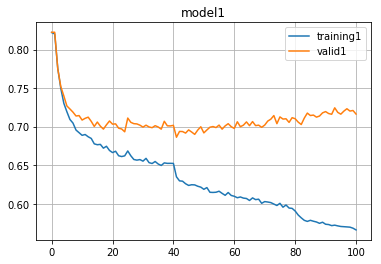

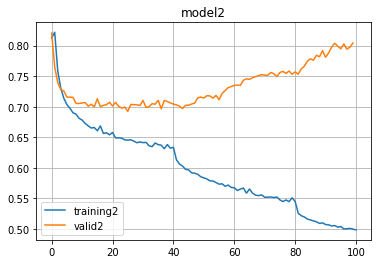

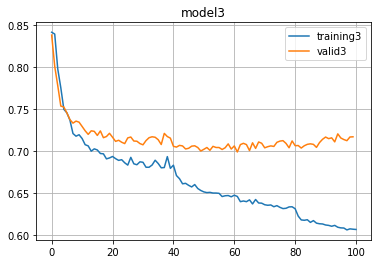

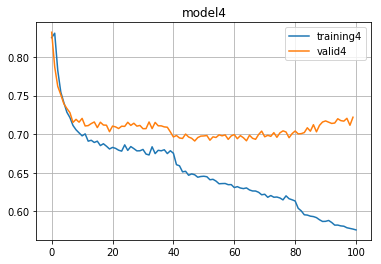

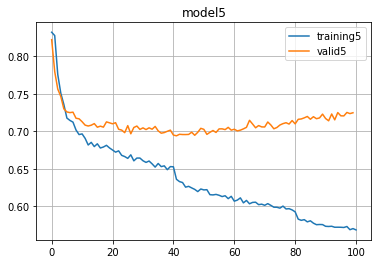

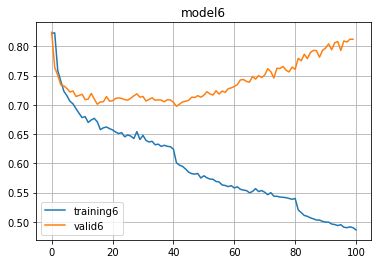

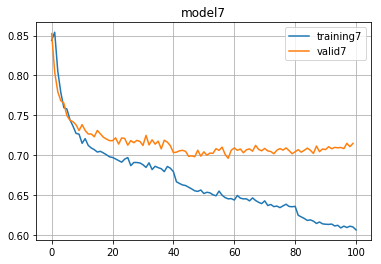

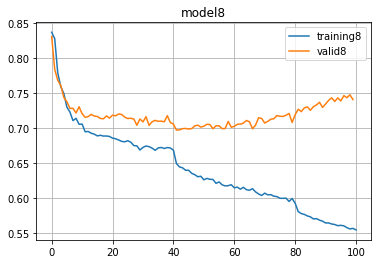

In [83]:
for idx in range(1,9) :
    plt.plot(eval("train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

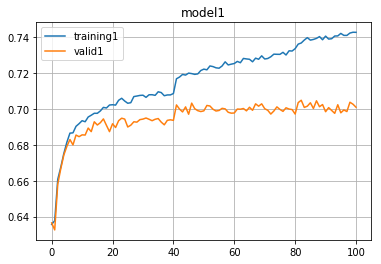

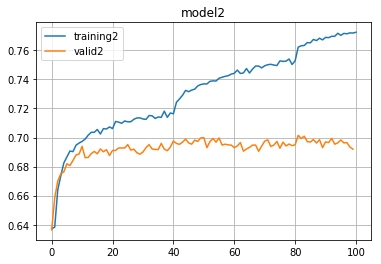

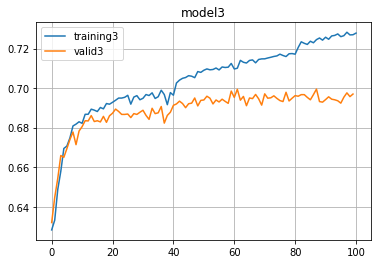

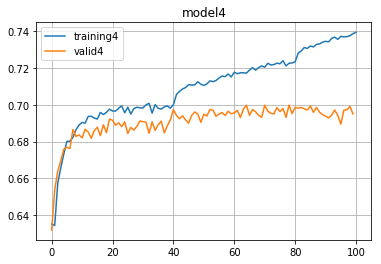

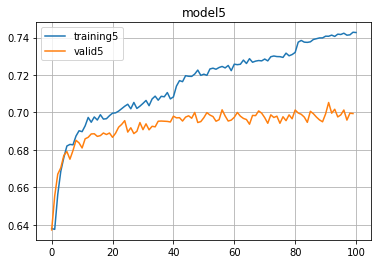

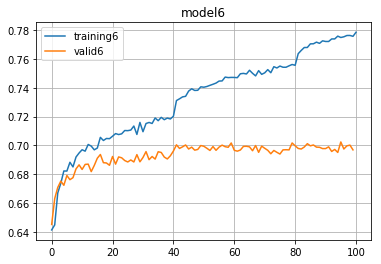

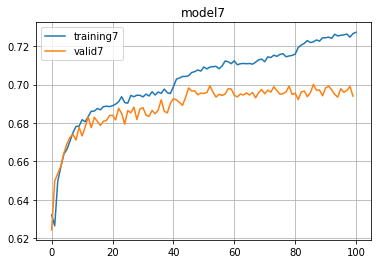

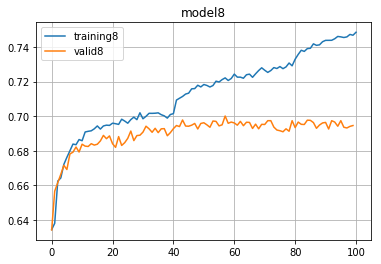

In [84]:
for idx in range(1,9) :
    plt.plot(eval("train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

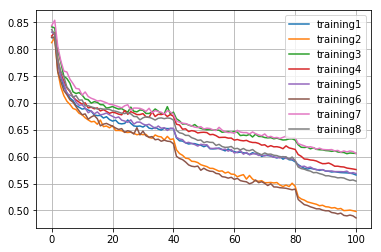

In [85]:
for idx in range(1,9) :
    plt.plot(eval("train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

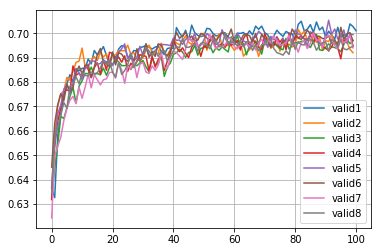

In [86]:
for idx in range(1,9) :
    plt.plot(eval("valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

In [80]:
tf.reset_default_graph() 

<br></br><br></br><br></br>

- payment 
    - week별 충전 금액
    
- trade
    - week별 교환 신청 횟수
    - week별 교환 받은 횟수
    - 교환 물품 횟수
    
- guild
    - 있었던 길드의 개수
    - 길드원의 평균 activity

- party 
    - week별 party 횟수
    - 파티원의 평균 activity

- 의문점
    - guild가 여러 개인 경우에는 어떻게 처리할건지
    - party와 guild의 정보를 어떻게 할건지
        - 현재 multi input model 알아보는 중, 지금까지 찾은건 맘에 드는 것이 없음
        - party id별, guild id별 정보를 만드는 것이 중요해보임
    - 플레이를 했던 시간대도 굉장히 중요할거같은데 이것을 어떻게 처리해야할지 애매

- 모델링 계획
    - zero padding으로 해보기(현재는 각 column의 최소값)
        - 3주차에 안하는 것과 8주차에 안하는 것은 차이나기 때문에 데이터를 몰아서 넣는 것이 아니라 중간중간에 빈 곳을 padding해줘야 함
    - guild/party등의 정보를 초기 state혹은 input에 concatenate하는 방식
    - CNN 사용
    - AutoEncoder 사용
        - guild/party 등의 정보를 추출할 때 사용
    - 모든 활동 내역을 시간 순으로 나열하여 각 주별로 RNN으로 처리하여 encoding

- 해결책
    - 각 주차에 시작한 사람들끼리 모델을 만들기
        - 1주차에 시작한 사람이랑 5주차에 시작한 사람에 차이를 줘야하기 때문
    - Attention
        - Transformer
    - token
        - 총 4개의 token을 사용(start, end, empty, zero)
        - 비어있는 것을 하나로 합치고, 대신 얼마나 비어있는지를 값으로 지정